<table><tr>
<td> <img src=https://www.baltimorepolice.org/themes/custom/bpd/images/bpd_logo.png alt="Drawing" style="height: 250px;"/> </td>
<td> <img src=https://beam-images.warnermediacdn.com/BEAM_LWM_DELIVERABLES/1bc3aff5-0d6a-4c0b-8ed0-5716ca30ab3b/fbbc7a604f327cfa8a7bbe614a89be13a246d266.jpg?host=wbd-images.prod-vod.h264.io&partner=beamcom style="height: 250px;"/> </td>
</tr></table>

VISUALIZACIONES:
=

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('New_BPD.csv')
df_2 = pd.read_csv('BPD_Date.csv')

WIKIPEDIA:
=

Población de Baltimore ciudad: 640.000 habitantes

Población del  área metropolitana: 2.700.000 habitantes.

Composición racial de la ciudad es de:  
- 64,85% afroamericanos; 
- 31,28% blancos;
- 1,70% hispanos
- 1,53% asiáticos; 
- 0,32% nativos americanos; 
- 0,32% de otras razas;

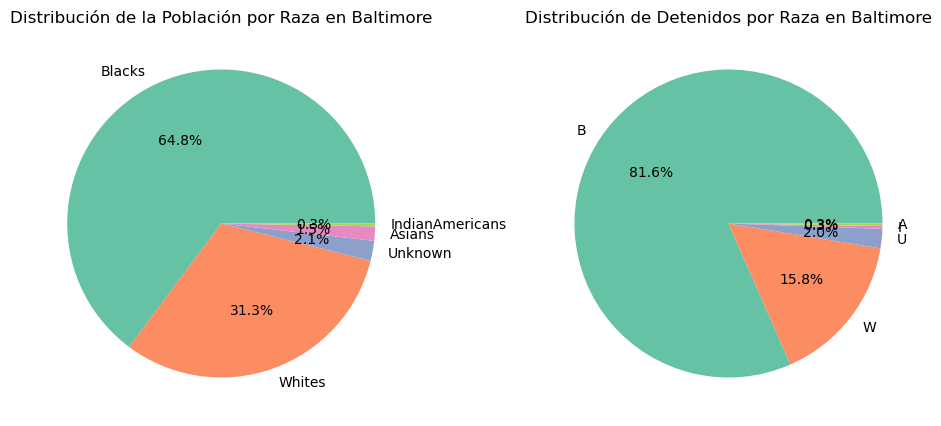

In [6]:
# Datos de la población de Baltimore por raza
population_data = {
    'Race': ['Blacks', 'Whites', 'Unknown', 'Asians', 'IndianAmericans'],
    'Percentage': [64.8, 31.3, 2.1, 1.5, 0.3]
}

# Crear un DataFrame para los datos de la población
population_df = pd.DataFrame(population_data)

# Contar el número de detenidos por raza en el DataFrame df
detained_counts = df_2['Race'].value_counts(normalize=True) * 100

# Datos de detenidos por raza
detained_data = {
    'Race': detained_counts.index,
    'Percentage': detained_counts.values
}

# Crear un DataFrame para los datos de los detenidos
detained_df = pd.DataFrame(detained_data)

# Crear gráficos de pastel
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de pastel para la población
axs[0].pie(population_df['Percentage'], labels=population_df['Race'], autopct='%1.1f%%', colors=sns.color_palette("Set2"))
axs[0].set_title('Distribución de la Población por Raza en Baltimore')

# Gráfico de pastel para los detenidos
axs[1].pie(detained_df['Percentage'], labels=detained_df['Race'], autopct='%1.1f%%', colors=sns.color_palette("Set2"))
axs[1].set_title('Distribución de Detenidos por Raza en Baltimore')

plt.show()

- Se observa claramente que mientras que el porcentaje de población negra sobre el total de la ciudad es del 64.8% el porcentaje de detencionesse dispara hasta el 81.6% (+17 puntos de diferencia).
- Por contra el porcentaje de población blanca baja del 31.3% en población total al 15.8% de detenciones. (-16 puntos)
- Mientras que el resto de etnias sigue un porcentaje similar entre porcentaje total de población y porcentaje de detenciones.

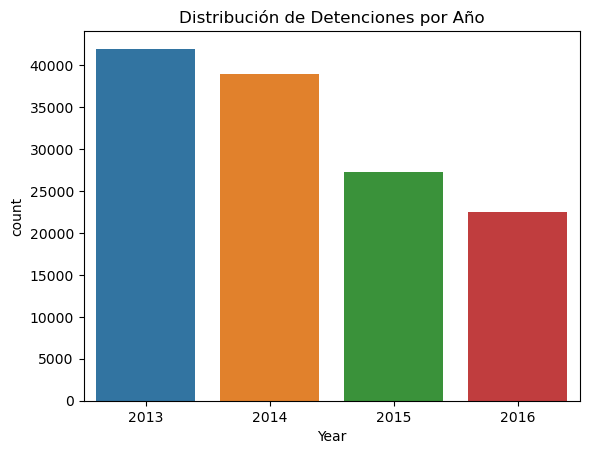

In [9]:
sns.countplot(data=df_2, x='Year')
plt.title('Distribución de Detenciones por Año')
plt.show()

- Se obserba un drástico descenso del número de detenidos.
- En un primer momento pienso que puede ser un error del dataset pero se comprueba y está todo correcto.
- Después pienso que la información del dataset puede haber sido sesgada por parte del Departamento de Policia o el Ayuntamiento que son las fuentes, así que decido investigar el porqué de este descenso.
- Descubro que en abril de 2014 el gobernador de Maryland aprobó una ley por la cual se descriminalizaba la posesión menor de marihuana. Pasa de ser penal a administrativo. Multa de 100 o 250$

*Se anexan varias noticias al respecto

<img src='img/1.png' alt="Drawing" style="height: 450px;"/>
<img src='img/4.png' alt="Drawing" style="height: 250px;"/>
<img src='img/2.png' alt="Drawing" style="height: 250px;"/>
<img src='img/3.png' alt="Drawing" style="height: 450px;"/>
<img src='img/6.png' alt="Drawing" style="height: 250px;"/>
<img src='img/5.png' alt="Drawing" style="height: 250px;"/>

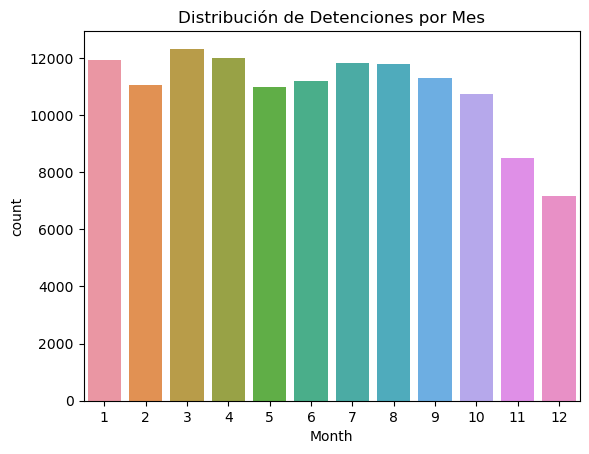

In [11]:
sns.countplot(data=df_2, x='Month')
plt.title('Distribución de Detenciones por Mes')
plt.show()

- Se observa un descenso en las detenciones en los meses de Noviembre y Diciembre.

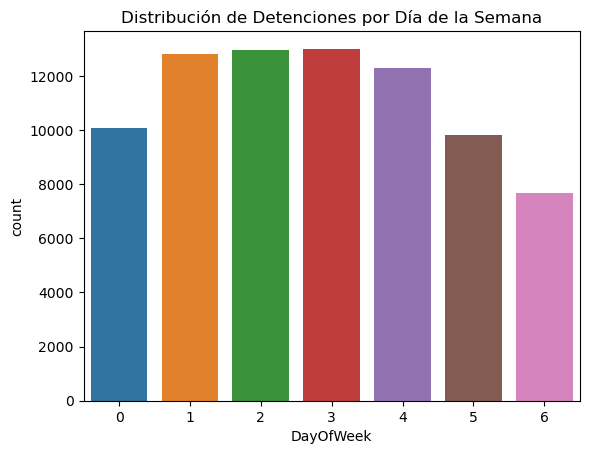

In [13]:
sns.countplot(data=df, x='DayOfWeek')
plt.title('Distribución de Detenciones por Día de la Semana')
plt.show()

- Martes, miércoles, Jueves y Viernes son los dias con más detenciones

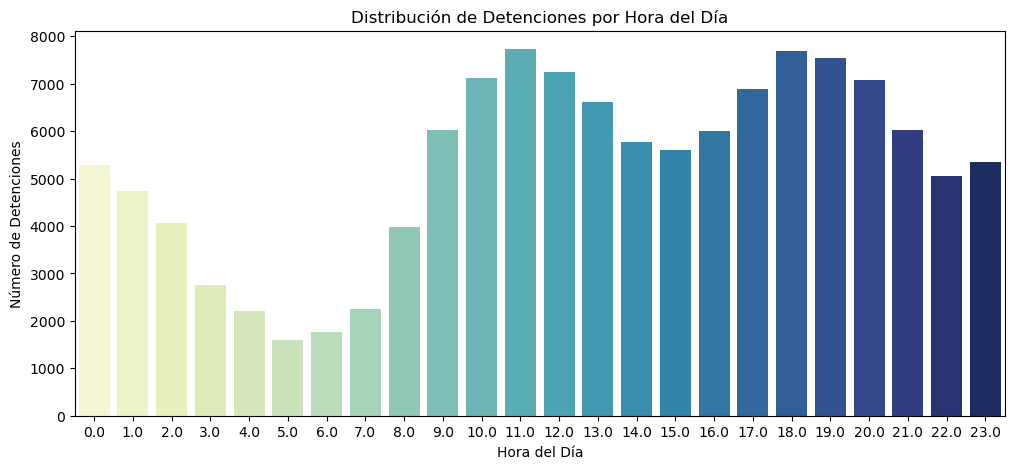

In [15]:
# Filtrar las filas donde 'Hour' es válido
df_valid_hours = df_2.dropna(subset=['Hour'])

# Crear el countplot para la distribución de detenciones por hora del día
plt.figure(figsize=(12, 5))
sns.countplot(data=df_valid_hours, x='Hour', palette='YlGnBu')
plt.title('Distribución de Detenciones por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Detenciones')
plt.xticks(range(24))
plt.show()

- Menos detenidos durante el turno de noche.
- Bajada del número de detenidos a las 06:00, a las 14:00 y a las 22:00h coincidiendo con el solape de los cambios de turno de los policias.

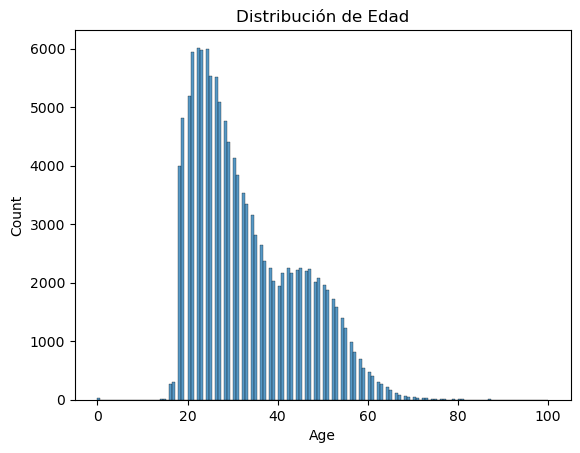

In [17]:
## Distribuciones de las características numéricas
sns.histplot(data=df_2, x='Age')
plt.title('Distribución de Edad')
plt.show()

- Mayor número de detenidos entre los 20 y los 30 años.

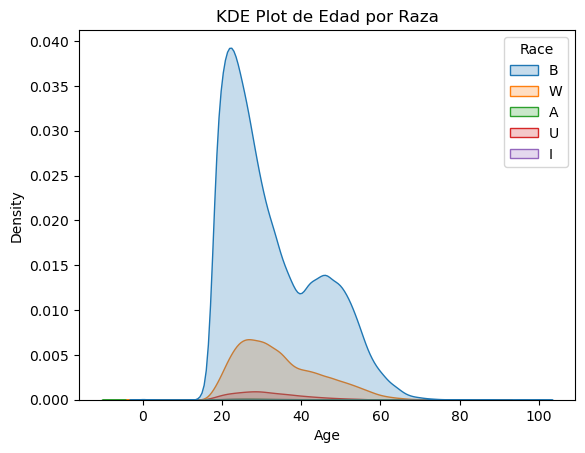

In [19]:
# KDE plots para ver densidades de edad por raza
sns.kdeplot(data=df_2, x='Age', hue='Race', fill=True)
plt.title('KDE Plot de Edad por Raza')
plt.show()

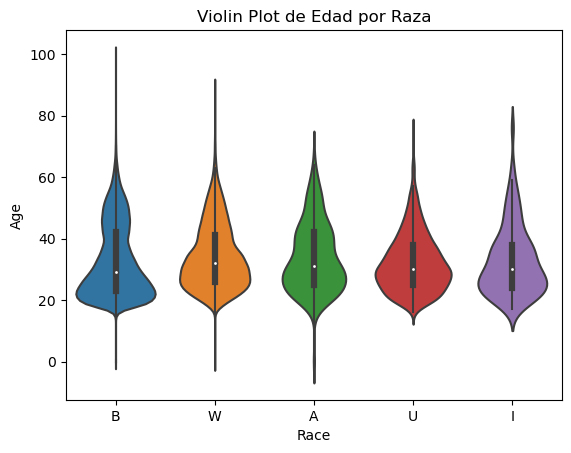

In [20]:
# Violin plots para ver distribución y densidad de edad por raza
sns.violinplot(data=df_2, x='Race', y='Age')
plt.title('Violin Plot de Edad por Raza')
plt.show()

- Destacar que el punto máximo de los detenidos negros es un poco menor.
- Patrones prácticamente idénticos en el resto de étnias. 

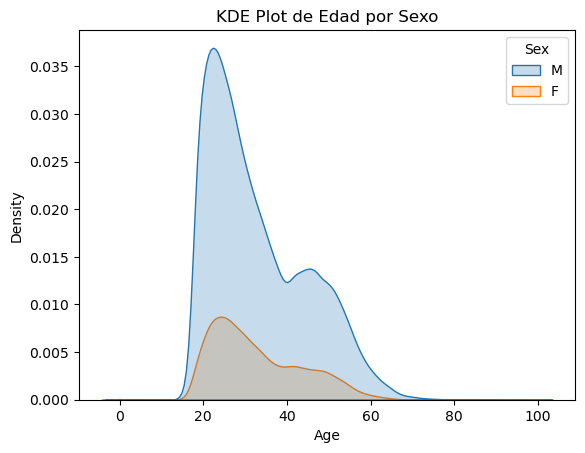

In [22]:
# KDE plots para ver densidades de edad por sexo
sns.kdeplot(data=df_2, x='Age', hue='Sex', fill=True)
plt.title('KDE Plot de Edad por Sexo')
plt.show()

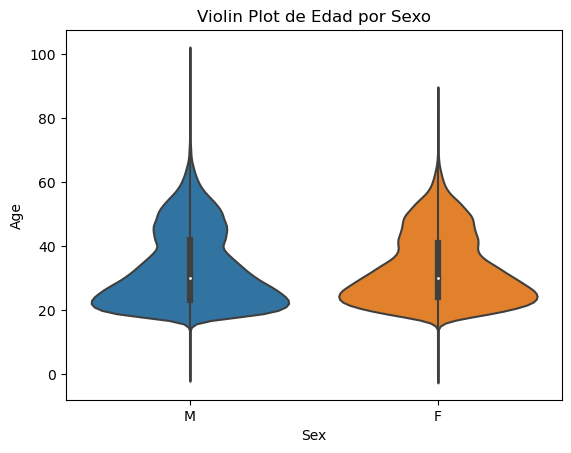

In [23]:
# Violin plots para ver distribución y densidad de edad por sexo
sns.violinplot(data=df_2, x='Sex', y='Age')
plt.title('Violin Plot de Edad por Sexo')
plt.show()

- Patrones casi idénticos al comparar por Edad y Sexo

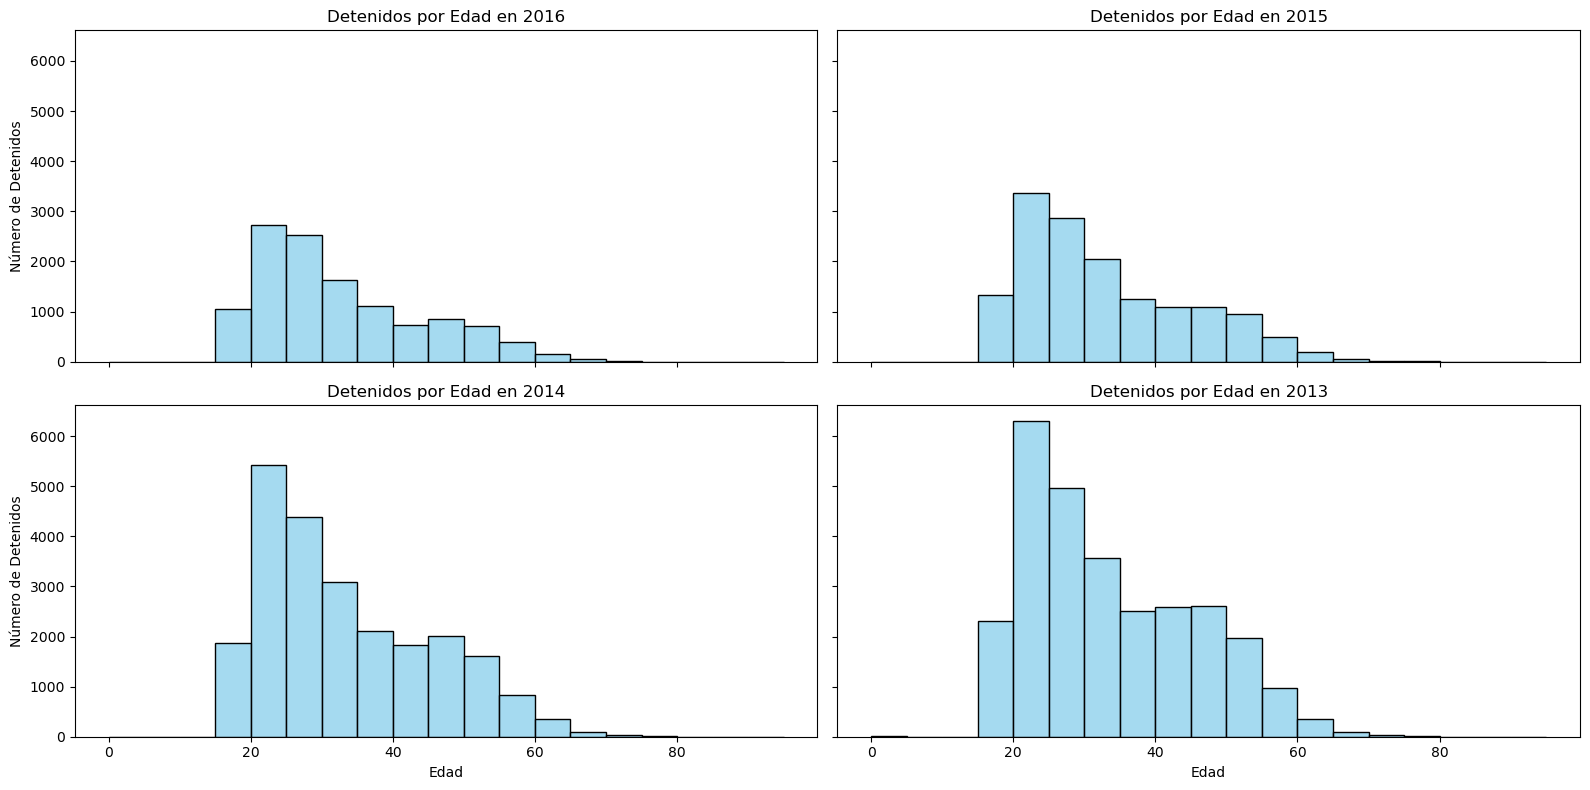

In [25]:
# Filtrar los datos para obtener solo los últimos 4 años
last_four_years = df_2['Year'].unique()[-4:]
df_last_four_years = df[df['Year'].isin(last_four_years)]

# Crear una figura con 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 8), sharex=True, sharey=True)
axes = axes.flatten()

# Crear gráficos de barras para cada año
for i, year in enumerate(last_four_years):
    ax = axes[i]
    sns.histplot(df_last_four_years[df_last_four_years['Year'] == year]['Age'], bins=range(0, 100, 5), ax=ax, kde=False, color='skyblue')
    ax.set_title(f'Edad de los Detenidos en {year}')
    ax.set_xlabel('Edad')
    ax.set_ylabel('Número de Detenidos')

# Ajustar el layout
plt.tight_layout()
plt.show()

- Bajada drástica en todas las edades pero más acusada entre 20 y 30 años.

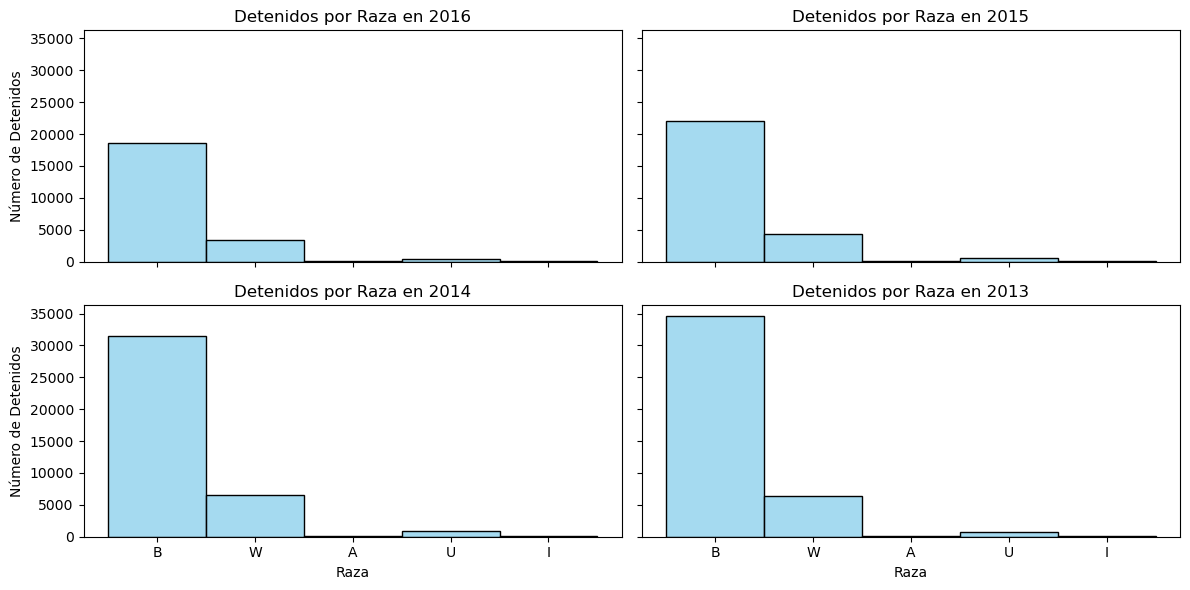

In [27]:
# Filtrar los datos para obtener solo los últimos 4 años
last_four_years = df_2['Year'].unique()[-4:]
df_last_four_years = df_2[df_2['Year'].isin(last_four_years)]

# Crear una figura con 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 6), sharex=True, sharey=True)
axes = axes.flatten()

# Crear gráficos de barras para cada año
for i, year in enumerate(last_four_years):
    ax = axes[i]
    sns.histplot(df_last_four_years[df_last_four_years['Year'] == year]['Race'], bins=range(0, 100, 5), ax=ax, kde=False, color='skyblue')
    ax.set_title(f'Detenidos por Raza en {year}')
    ax.set_xlabel('Raza')
    ax.set_ylabel('Número de Detenidos')

# Ajustar el layout
plt.tight_layout()
plt.show()

- Bajada drástica de un 40% de los detenidos de todas las étnias.

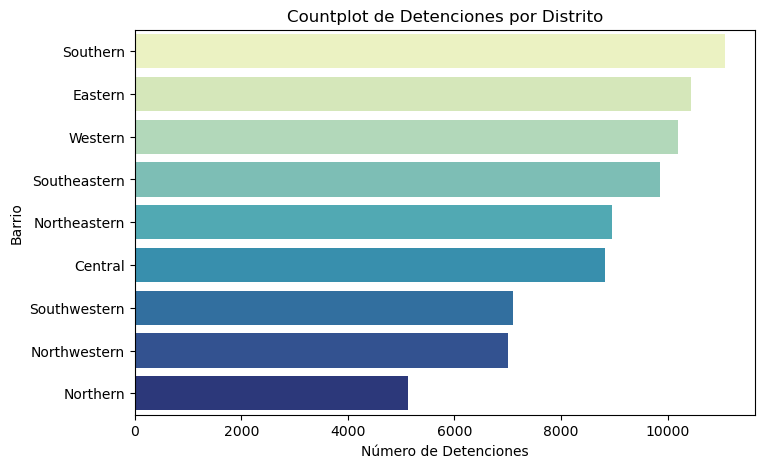

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_2, y='District', order=df['District'].value_counts().index, palette='YlGnBu')
plt.title('Countplot de Detenciones por Distrito')
plt.xlabel('Número de Detenciones')
plt.ylabel('Barrio')
plt.show()

- Se aprecia que las zonas Norte, Noroeste y Suroeste son las que tienen menos detenciones. 
- Son barrios con muy poca densidad de población. Zonas verdes y/o residenciales.

<table><tr>
<td> <img src='img/Densidad_Razas.png' alt="Drawing" style="height: 550px;"/> </td>
<td> <img src='img/Leyenda_Mapa_Densidad.png' style="height: 150px;"/> </td>
</tr></table>

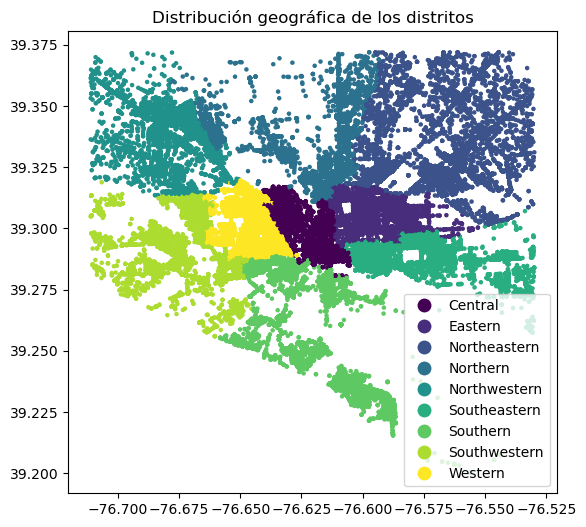

In [32]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Crear la figura y los ejes, especificando el tamaño de la figura
fig, ax = plt.subplots(figsize=(14, 6))

# Plotear el GeoDataFrame en los ejes creados
gdf.plot(column='District', cmap='viridis', legend=True, markersize=5, ax=ax)

# Añadir el título
plt.title('Distribución geográfica de los distritos')

# Mostrar el gráfico
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


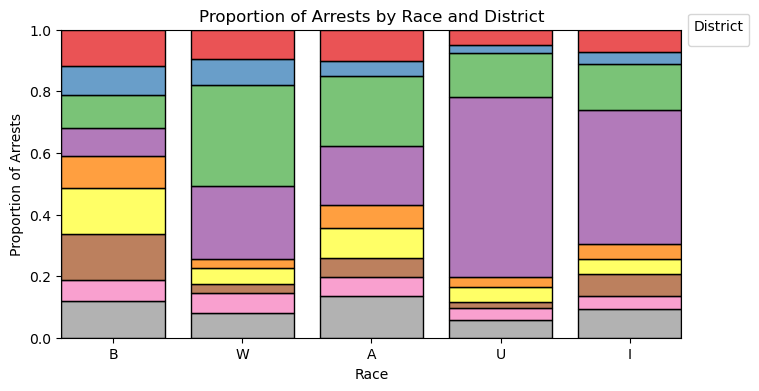

In [33]:
plt.figure(figsize=(8,4))
ax = sns.histplot(
    data=df_2,
    x='Race',
    hue='District',
    multiple='fill',
    shrink=.8,
    palette='Set1'
)

plt.legend(loc='center left', bbox_to_anchor=(1, 1), title='District')

plt.xlabel('Race')
plt.ylabel('Proportion of Arrests')
plt.title('Proportion of Arrests by Race and District')

plt.show()

<img src='img/Leyenda_Porcentaje_Barrios.png' alt="Drawing" style="height: 60px;"/>

- Nos llama la atención los porcentajes verde+lila que corresponden a los barrios sur y sureste.
- Es donde hay un mayor porcentaje de detenidos de étnia hispana, blanca, amerindios y asiáticos.
- El porcentaje de detenidos por distrito de raza negra es mucho más homogéneo en todos los distritos. 

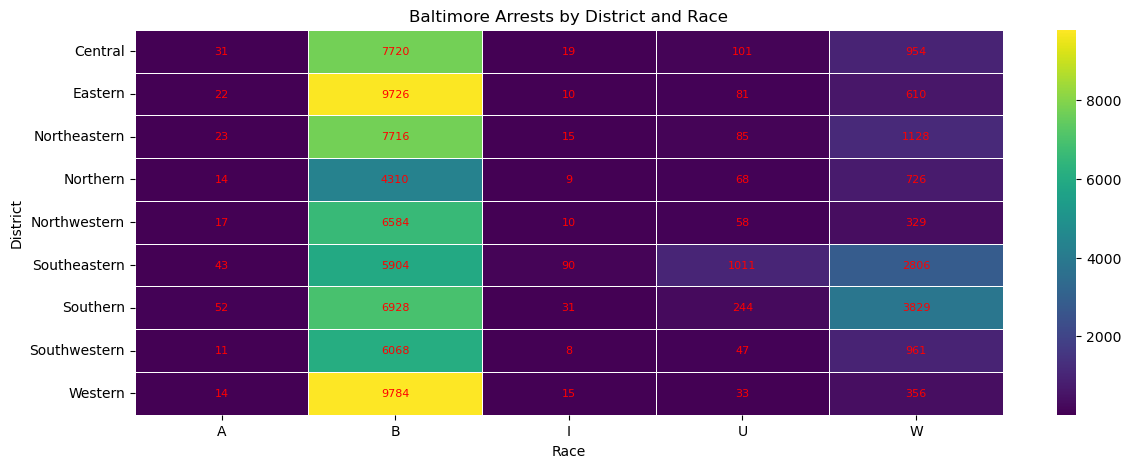

In [36]:
# Mapa de calor: Arrestados por distrito y raza
heatmap_data = df_2.pivot_table(index='District', columns='Race', aggfunc='size', fill_value=0)
plt.figure(figsize=(14, 5))
ax = sns.heatmap(heatmap_data, cmap='viridis', annot=False, fmt="d", linewidths=.5)
plt.title('Baltimore Arrests by District and Race')
plt.xlabel('Race')
plt.ylabel('District')

# Anotar los valores manualmente
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        ax.text(j + 0.5, i + 0.5, heatmap_data.iloc[i, j], 
                ha='center', va='center', color='red', fontsize=8)

plt.show()

- Sur y Sureste es donde hay un mayor porcentaje de detenidos de étnia hispana, blanca, amerindios y asiáticos.
- El porcentaje de detenidos por distrito de raza negra es mucho más homogéneo en todos los distritos. Destacan Este y Oeste por alto y Norte por bajo.

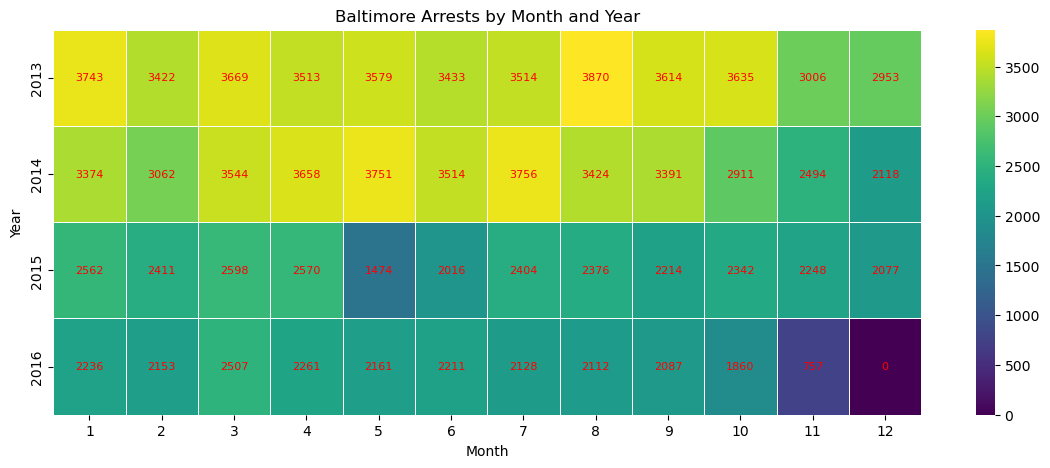

In [38]:
# Mapa de calor: Arrestados por mes y año
heatmap_data = df_2.pivot_table(index='Year', columns='Month', aggfunc='size', fill_value=0)
plt.figure(figsize=(14, 5))
ax = sns.heatmap(heatmap_data, cmap='viridis', annot=False, fmt="d", linewidths=.5)
plt.title('Baltimore Arrests by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')

# Anotar los valores manualmente
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        ax.text(j + 0.5, i + 0.5, heatmap_data.iloc[i, j], 
                ha='center', va='center', color='red', fontsize=8)
plt.show()

- Llama la atención que si comparamos cualquier mes de 2013 con el mismo mes de 2016 el número de detenidos ha caído un 40%.
- Falta medio Noviembre y todo Diciembre de 2016

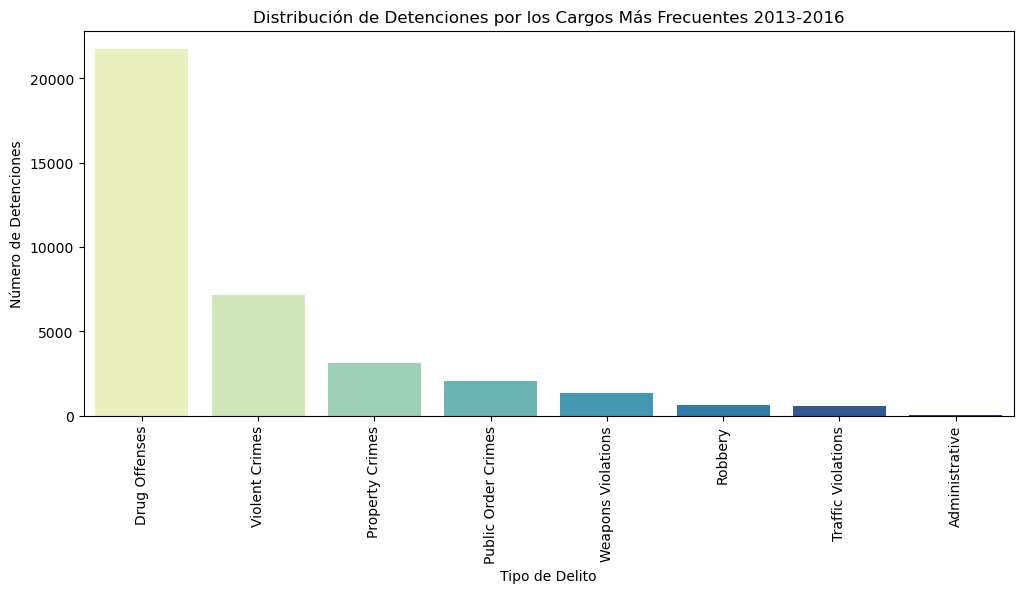

In [40]:
# Delitos más frecuentes:
# =======================

# Eliminar filas con 'Other'
df_ChargeCategory = df[~df['ChargeCategory'].str.strip().str.lower().eq('other')]

# # Calcular los 10 delitos más frecuentes
top_10_offenses = df_ChargeCategory['ChargeCategory'].value_counts().nlargest(10).index

# Countplot de detenciones por tipo de delito para los 10 delitos más frecuentes
plt.figure(figsize=(12, 5))
sns.countplot(data=df_ChargeCategory, x='ChargeCategory', order=top_10_offenses, palette='YlGnBu')
plt.title('Distribución de Detenciones por los Cargos Más Frecuentes 2013-2016')
plt.xticks(rotation=90)
plt.xlabel('Tipo de Delito')
plt.ylabel('Número de Detenciones')
plt.show()

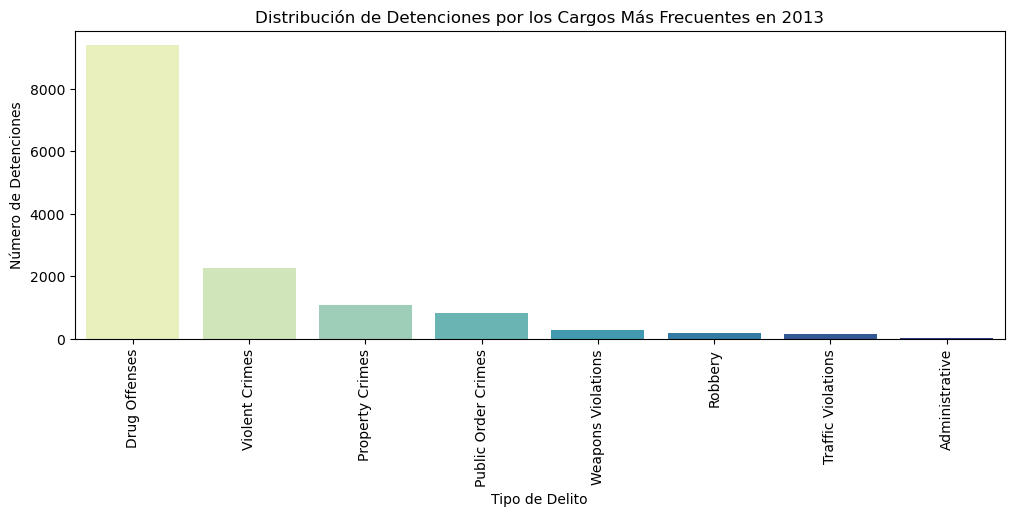

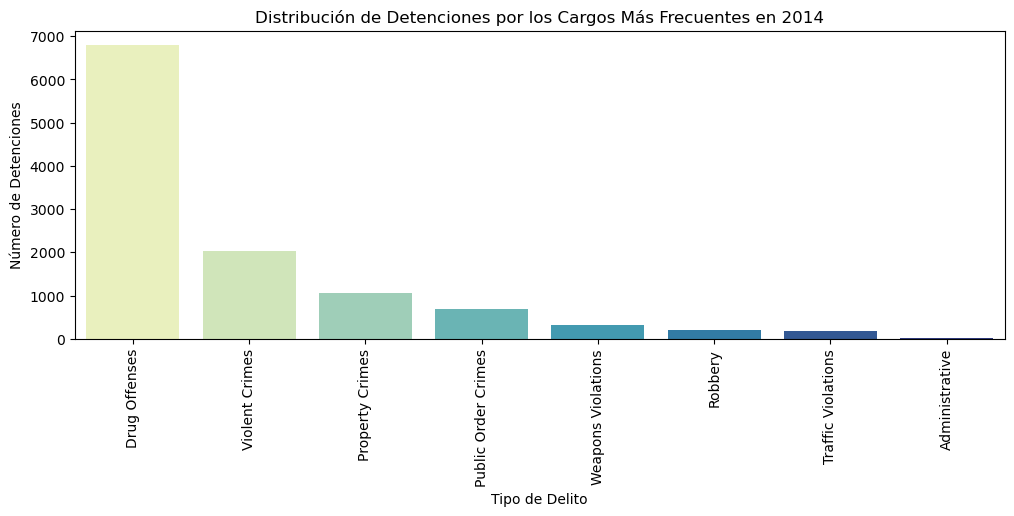

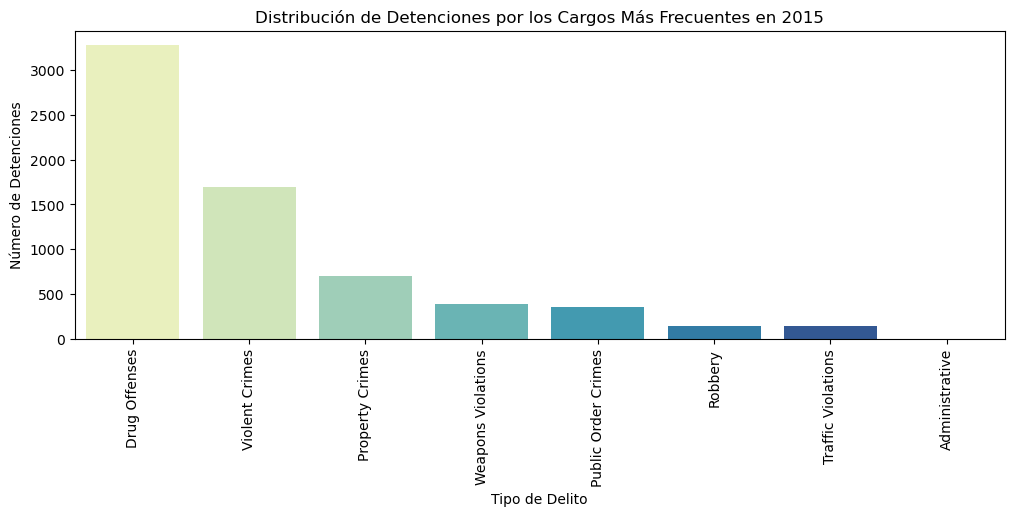

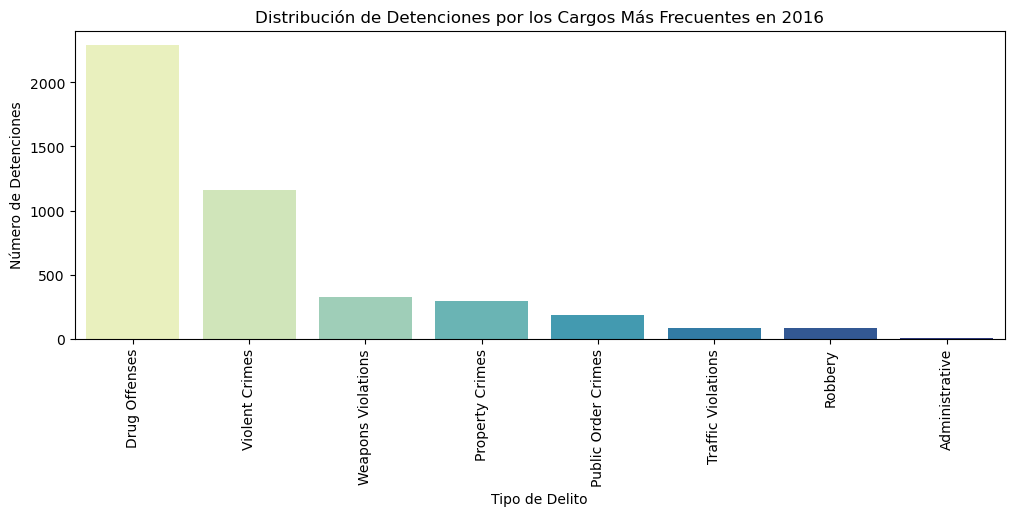

In [41]:
# Filtrar por año y calcular los 10 delitos más frecuentes
years = [2013, 2014, 2015, 2016]

for year in years:
    df_year = df_ChargeCategory[df_ChargeCategory['Year'] == year]
    top_10_offenses = df_year['ChargeCategory'].value_counts().nlargest(10).index

    plt.figure(figsize=(12, 4))
    sns.countplot(data=df_year, x='ChargeCategory', order=top_10_offenses, palette='YlGnBu')
    plt.title(f'Distribución de Detenciones por los Cargos Más Frecuentes en {year}')
    plt.xticks(rotation=90)
    plt.xlabel('Tipo de Delito')
    plt.ylabel('Número de Detenciones')
    plt.show()

<!-- MAPA INTERACTIVO DE ARRESTOS POR LOS 5 DELITOS MÁS COMUNES Y AÑO -->

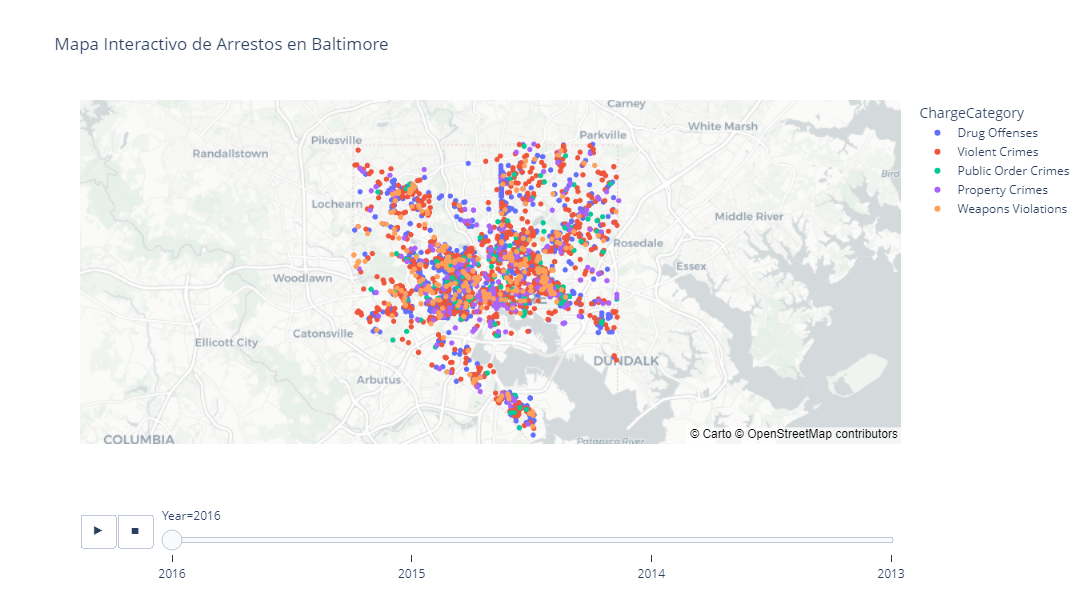

In [84]:
# Filtrar por los 5 delitos más repetidos
top_offenses = df['ChargeCategory'].value_counts().nlargest(5).index
df_top_offenses = df[df['ChargeCategory'].isin(top_offenses)]

# Crear el mapa interactivo con Plotly
fig = px.scatter_mapbox(
    df_top_offenses,
    lat='Latitude',
    lon='Longitude',
    color='ChargeCategory',
    height=600,
    width=700,
    size_max=15,
    zoom=10,
    mapbox_style="carto-positron",
    animation_frame='Year',
    title='Mapa Interactivo de Arrestos en Baltimore'
)

fig.show()

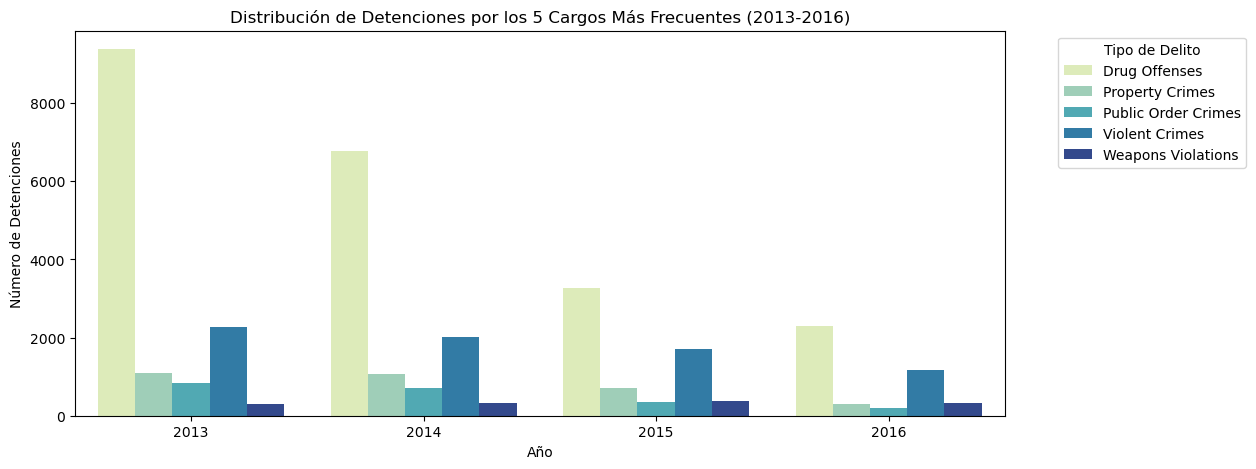

In [44]:
# Obtener los 5 delitos más frecuentes en todos los años combinados
top_5_offenses = df_ChargeCategory['ChargeCategory'].value_counts().nlargest(5).index

# Crear una columna 'Count' que indique el número de delitos
df_ChargeCategory['Count'] = 1

# Filtrar por los 5 delitos más frecuentes y agrupar por año y categoría de delito
df_top_5 = df_ChargeCategory[df_ChargeCategory['ChargeCategory'].isin(top_5_offenses)]
df_top_5_grouped = df_top_5.groupby(['Year', 'ChargeCategory']).size().reset_index(name='Counts')

# Crear la visualización
plt.figure(figsize=(12, 5))
sns.barplot(data=df_top_5_grouped, x='Year', y='Counts', hue='ChargeCategory', palette='YlGnBu')
plt.title('Distribución de Detenciones por los 5 Cargos Más Frecuentes (2013-2016)')
plt.xlabel('Año')
plt.ylabel('Número de Detenciones')
plt.legend(title='Tipo de Delito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


- Al Comparar por años se obserba una bajada drástica de las detenciones por Drogas.

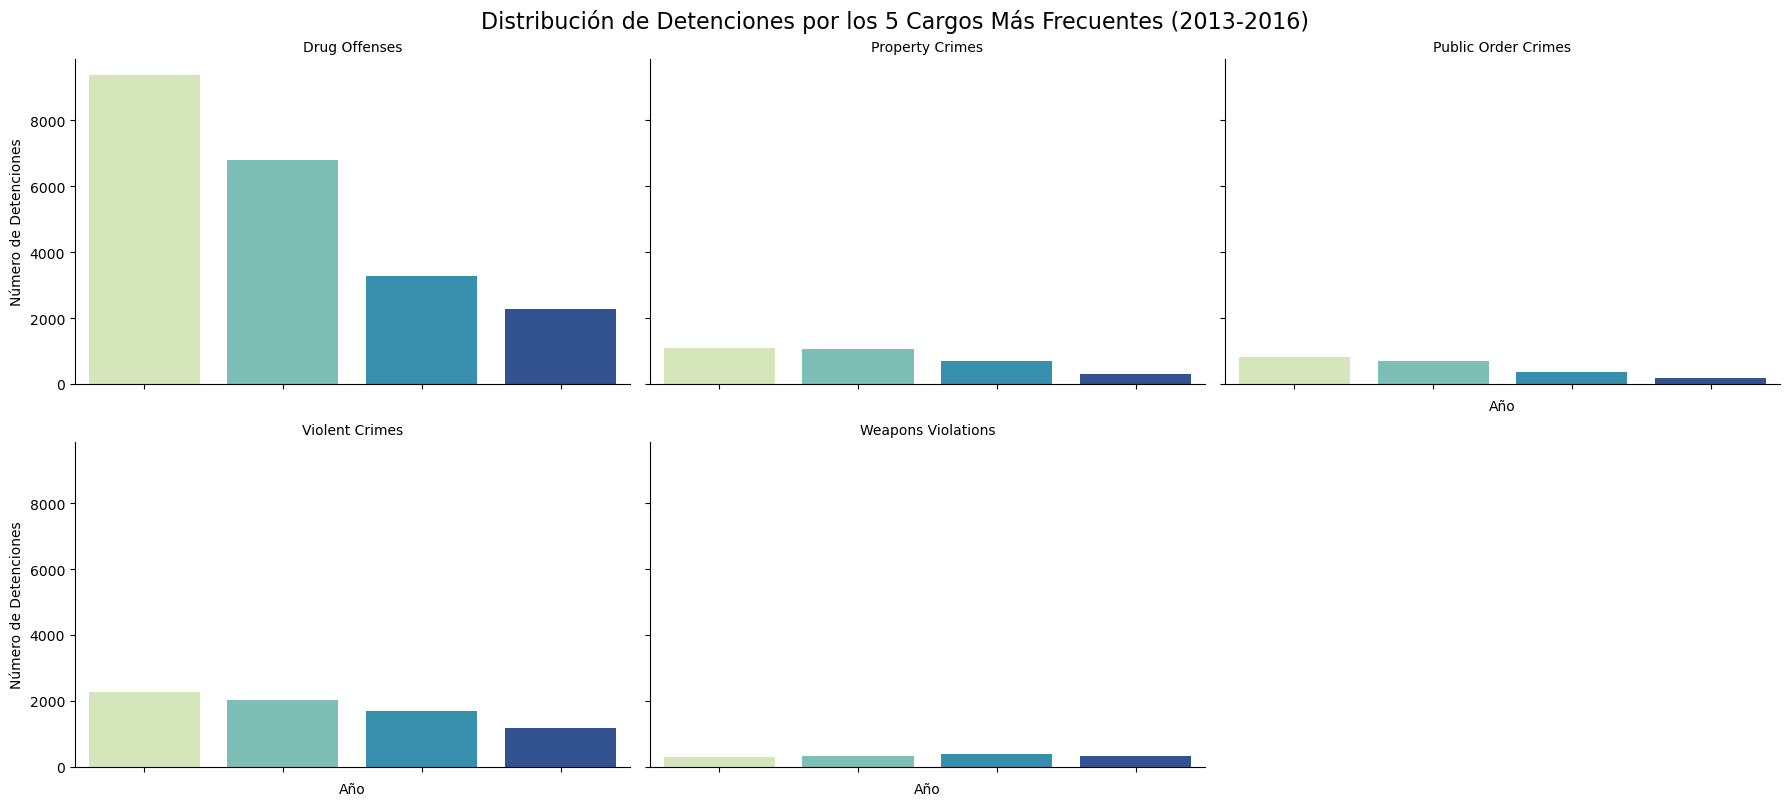

In [46]:
# Obtener los 5 delitos más frecuentes en todos los años combinados
top_5_offenses = df_ChargeCategory['ChargeCategory'].value_counts().nlargest(5).index

# Filtrar por los 5 delitos más frecuentes
df_top_5 = df_ChargeCategory[df_ChargeCategory['ChargeCategory'].isin(top_5_offenses)]

# Crear una columna 'Count' que indique el número de delitos
df_top_5['Count'] = 1

# Agrupar por año y categoría de delito
df_top_5_grouped = df_top_5.groupby(['Year', 'ChargeCategory']).size().reset_index(name='Counts')

# Crear el FacetGrid
g = sns.FacetGrid(df_top_5_grouped, col='ChargeCategory', col_wrap=3, height=4, aspect=1.5)
g.map(sns.barplot, 'Year', 'Counts', order=[2013, 2014, 2015, 2016], palette='YlGnBu')

# Ajustar el título y las etiquetas de los ejes
g.set_titles("{col_name}")
g.set_axis_labels("Año", "Número de Detenciones")

# Ajustar la rotación de las etiquetas del eje x
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.suptitle('Distribución de Detenciones por los 5 Cargos Más Frecuentes (2013-2016)', fontsize=16, y=1.02)
plt.show()

- Podemos observar que los principales delitos caen entre 2013 y 2016 pero son claramente los relacionados con las Drogas los que sufren una bajada más drástica. Pasando de más de 9000 detenciones en 2013 a poco más de 2000 detenciones en 2016.